Steps:
1. Import, read, head nad dtype
2. Check for NA values
3. Graphs
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
4. Convert, Encode and Normalization
5. Factor Analysis
    1. Check Data Adequacy[KMO, Bartllet]
    2. *Feature Extraction[Scree Plot, Kaiser criterion, PCA, Maximum Likelihood]
    3. Factor Rotation[Promax, Varimax]
6. Model Training and Prediction[KAN]
7. Model Performance Measure

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sp
import random
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import os
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
#read car data
data = pd.read_csv('./data/car_data.csv')

In [93]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [95]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [96]:
data = data.fillna('0')

# Graph

## Univariable Analysis

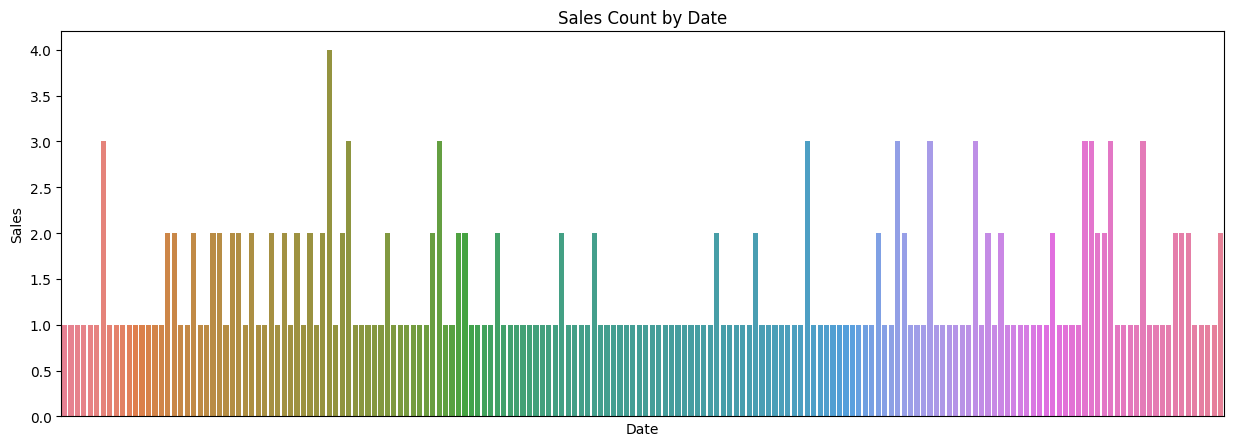

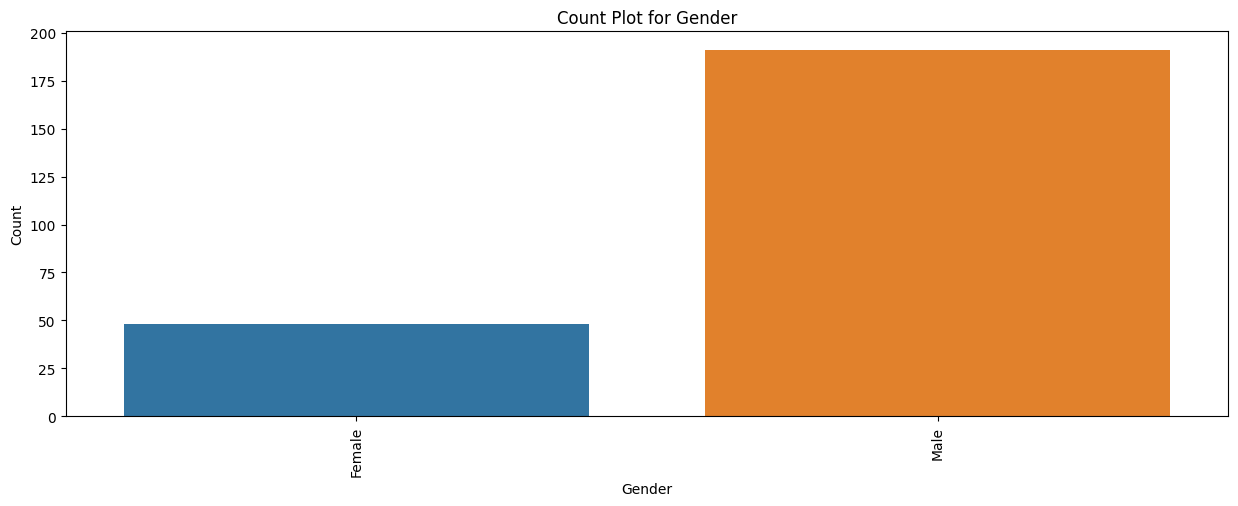

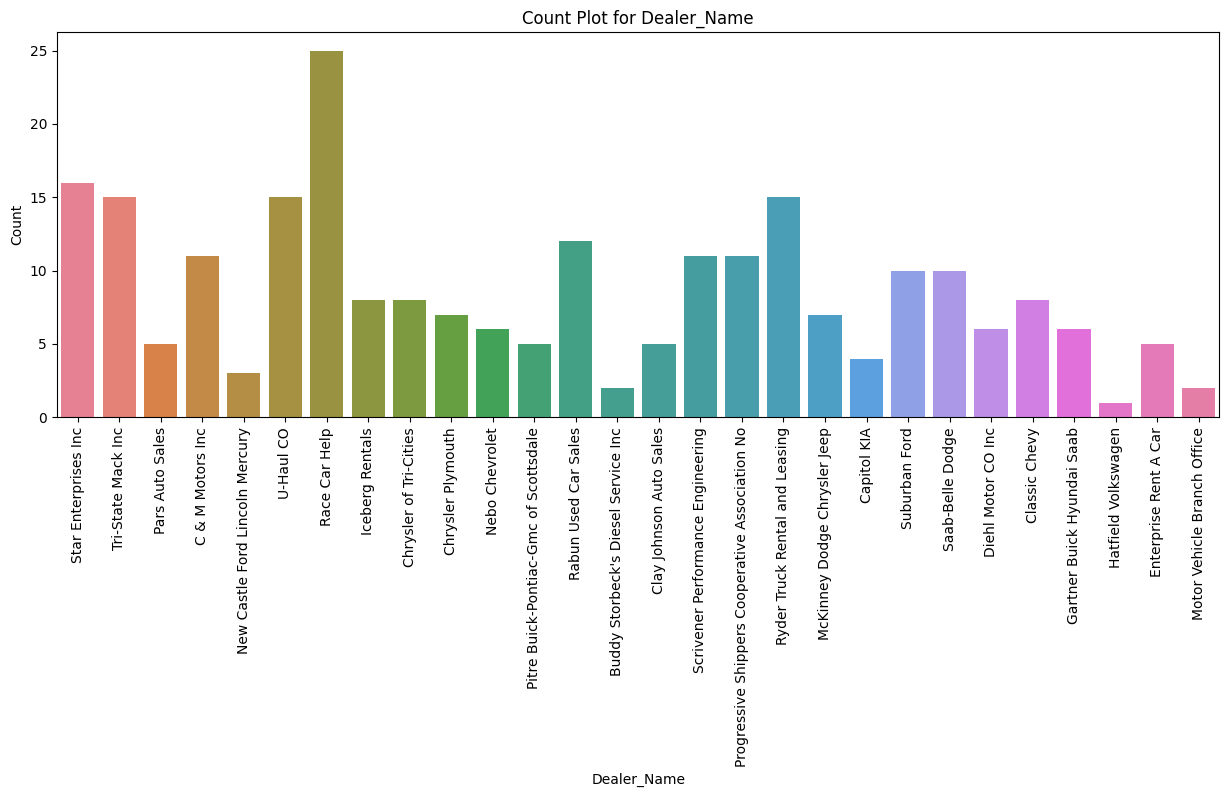

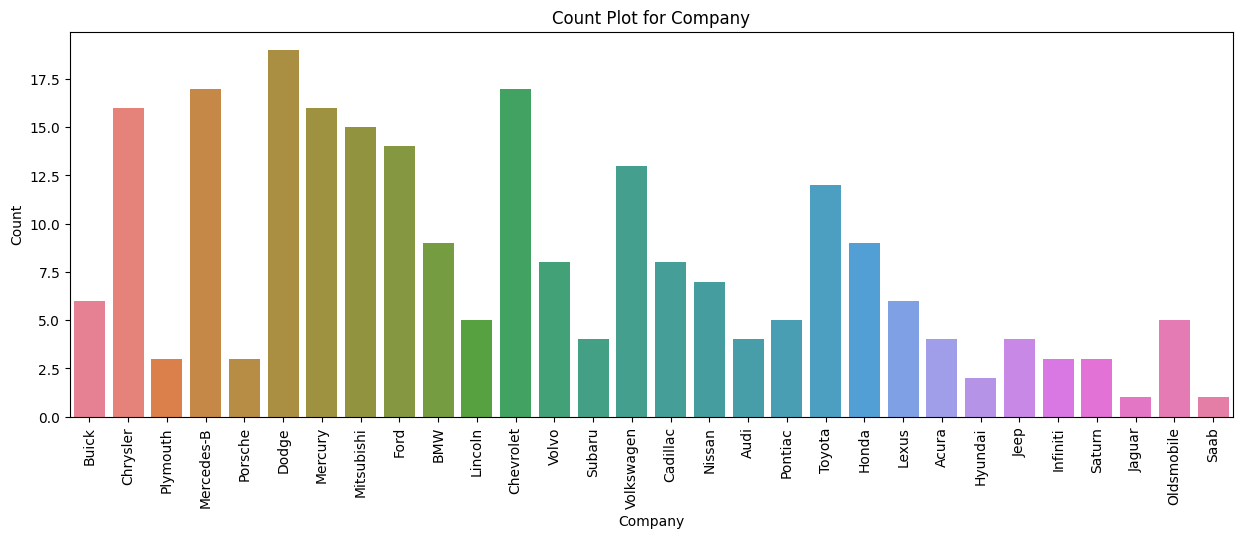

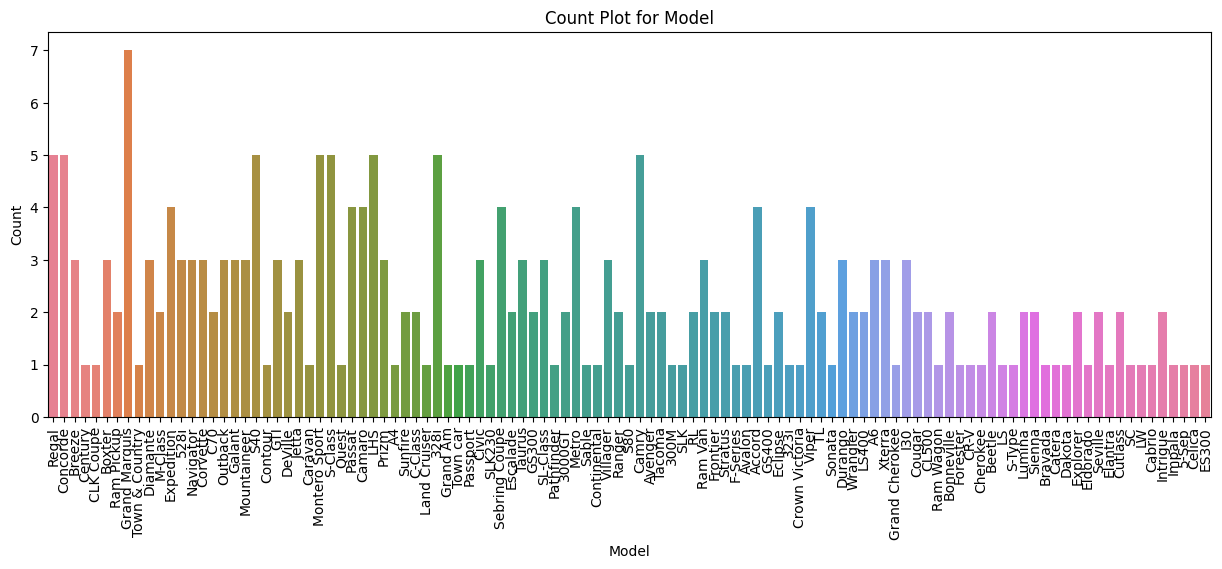

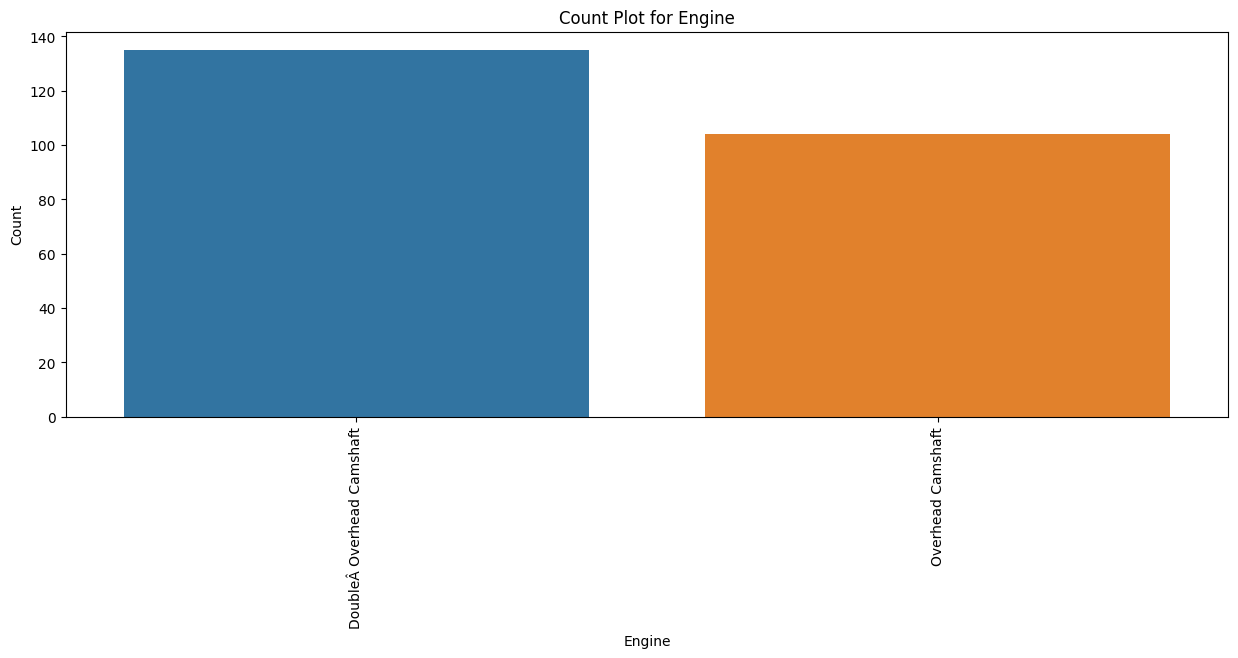

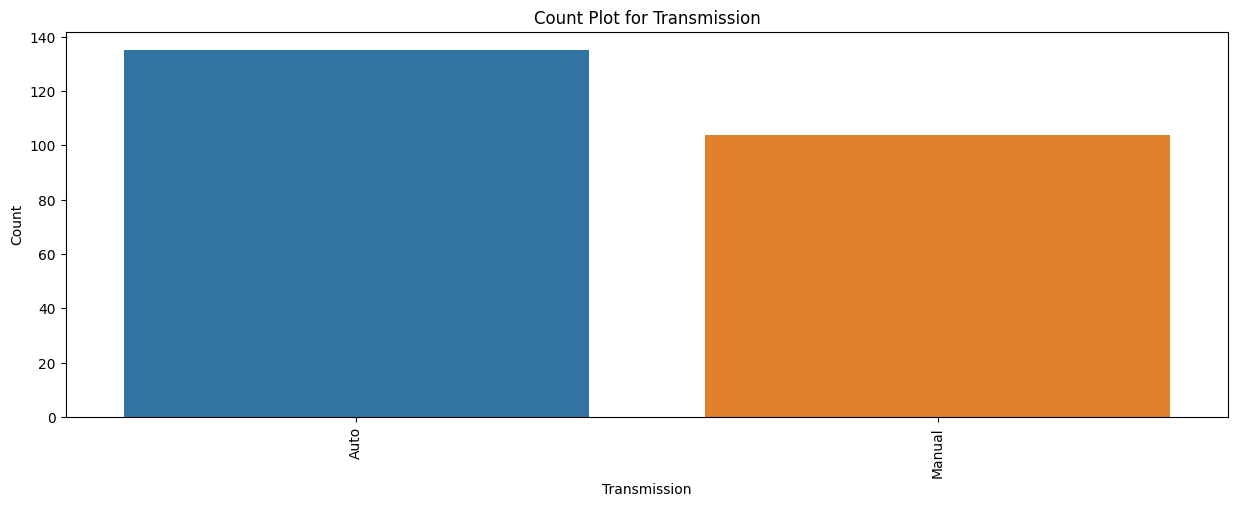

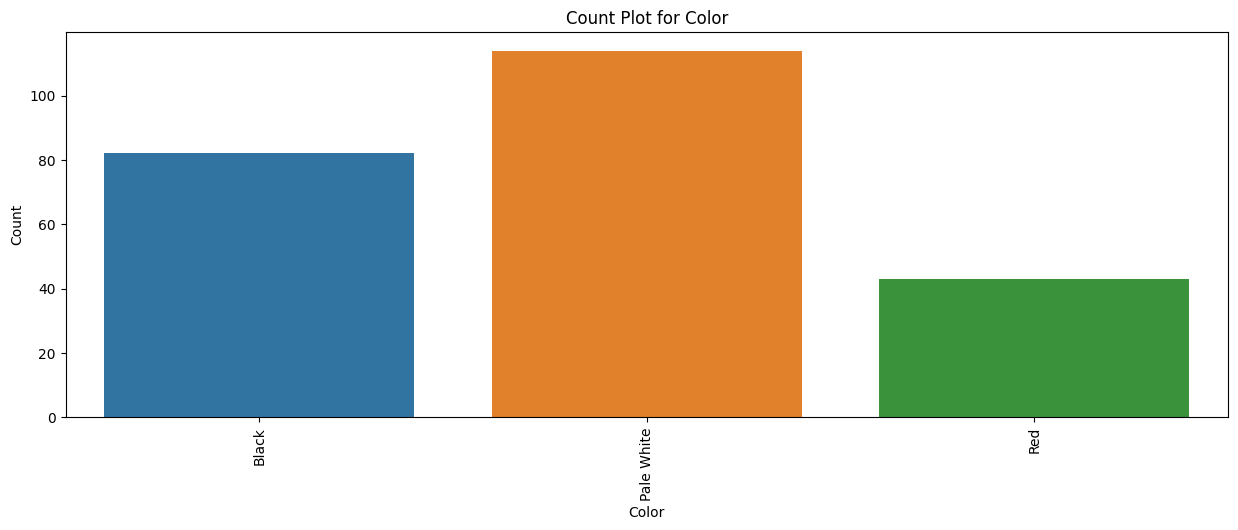

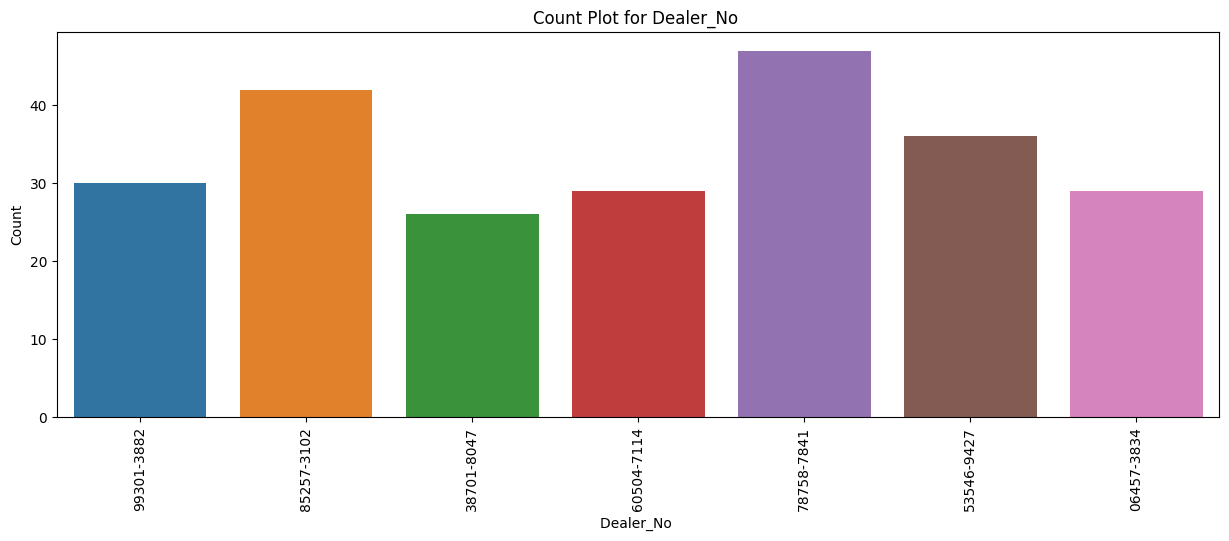

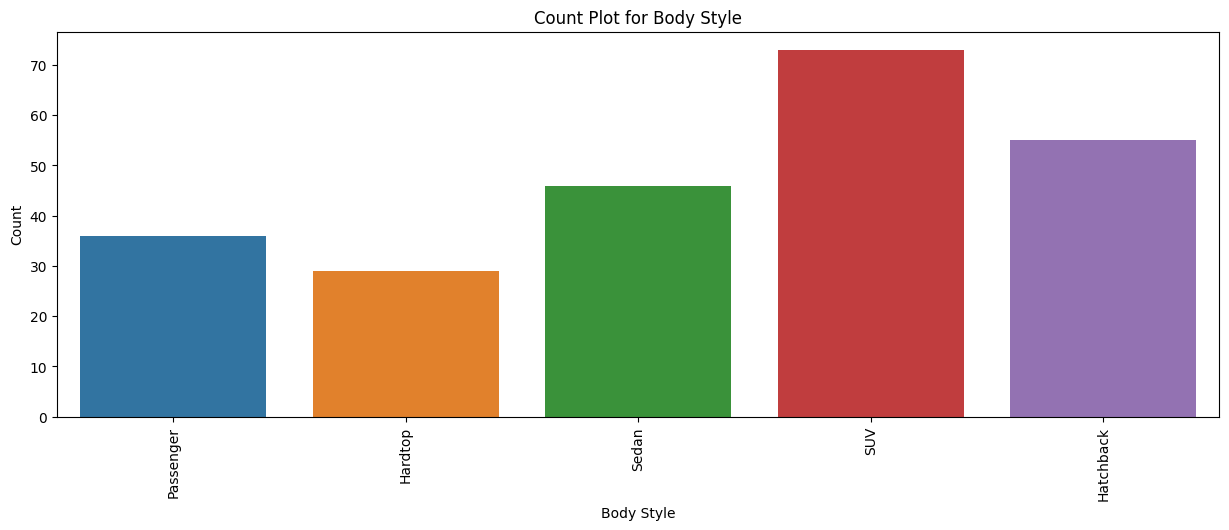

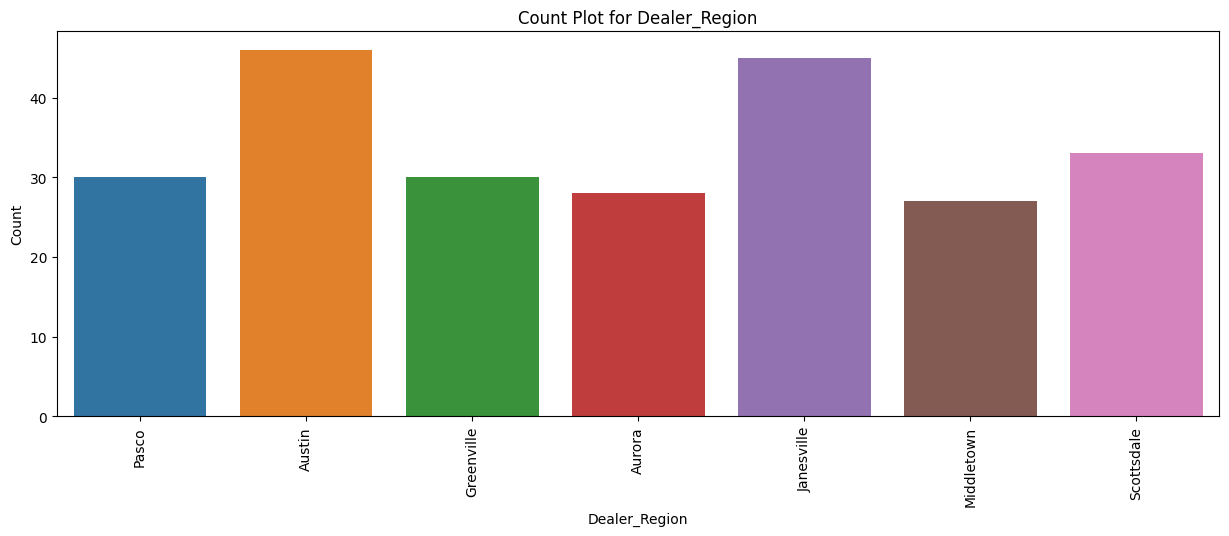

In [97]:
sampled_data = data.sample(frac=0.01, random_state=42)

object_columns = sampled_data.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['Car_id','Customer Name','Date'])

if not os.path.exists('./graph/univariate'):
    os.makedirs('./graph/univariate')

# For Date Count
sales_counts = sampled_data['Date'].value_counts().sort_index().reset_index()
sales_counts.columns = ['Date', 'Sales']
plt.figure(figsize=(15, 5))
sns.barplot(x='Date', y='Sales', data=sales_counts, hue='Date')
plt.title('Sales Count by Date')
plt.xticks([])
plt.savefig('./graph/univariate/sales_count_by_date.png')
plt.show()

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=object_columns[i], data=sampled_data, hue=object_columns[i])
    plt.title(f'Count Plot for {object_columns[i]}')
    plt.xlabel(object_columns[i])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/univariate/{object_columns[i]}_countplot.png')

plt.show()

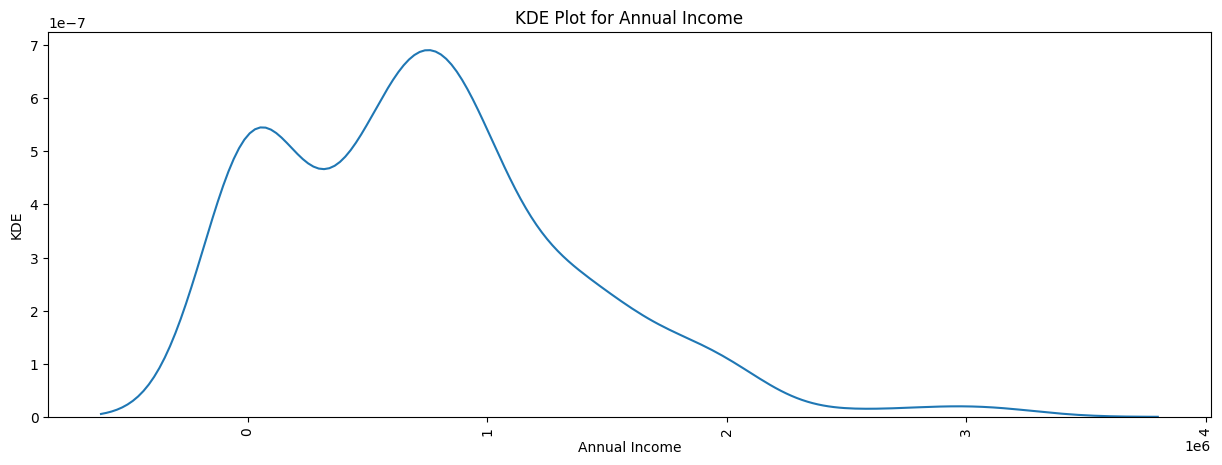

In [98]:
plt.figure(figsize=(15, 5))
sns.kdeplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/univariate/Annual_Income_KDEplot.png')
plt.show()

## Bivariable Analysis

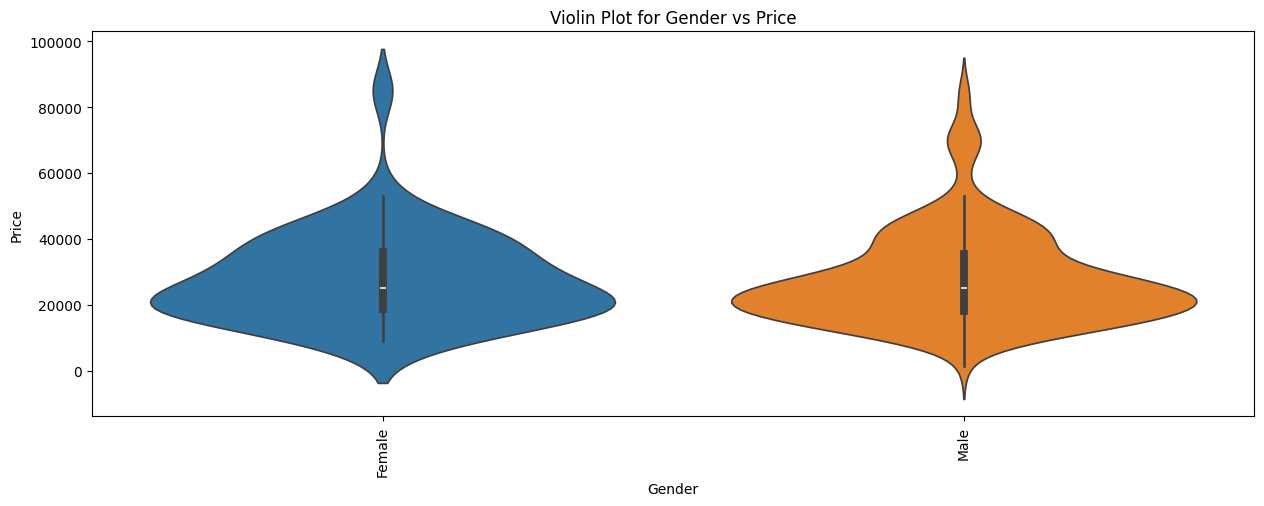

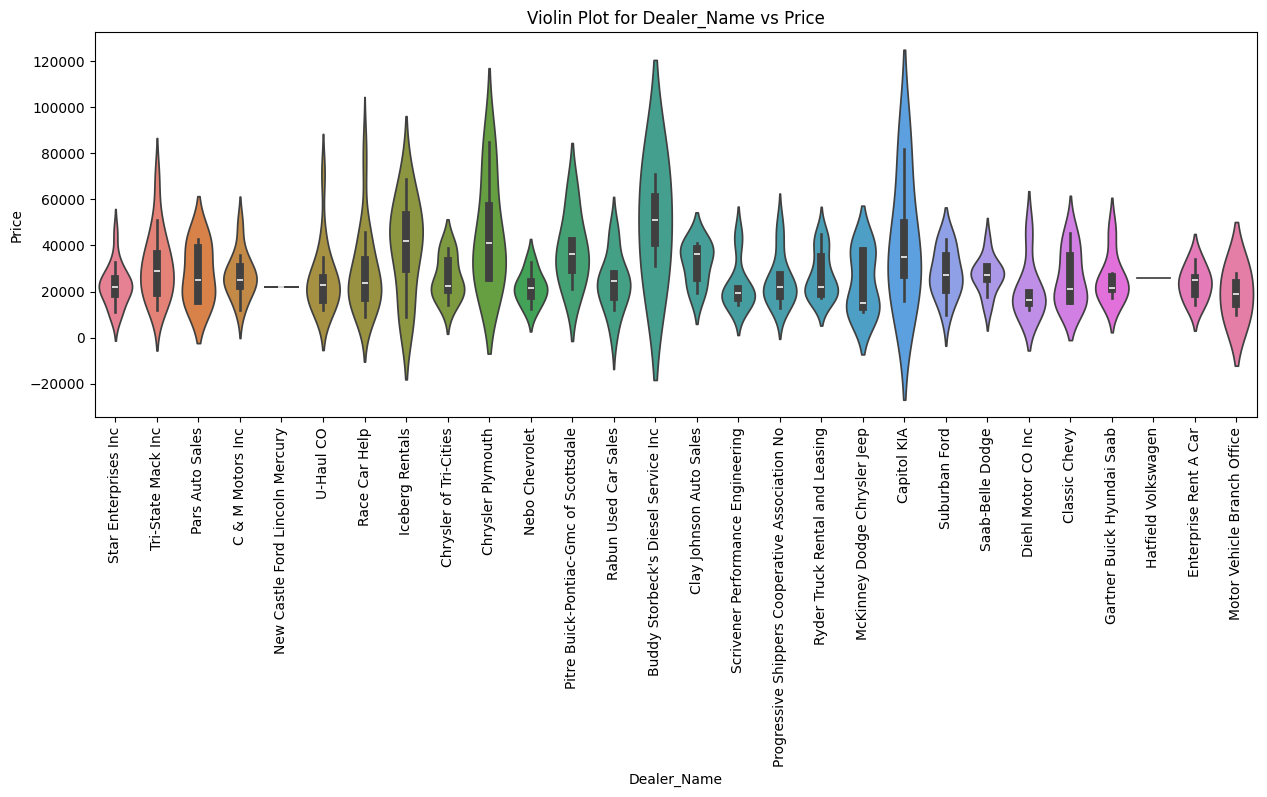

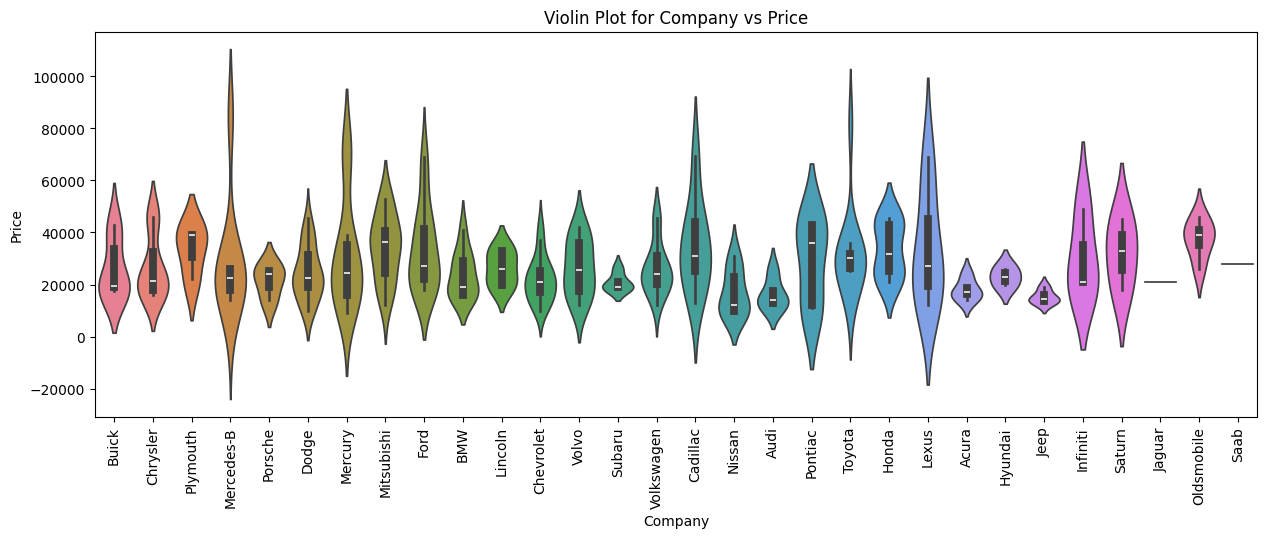

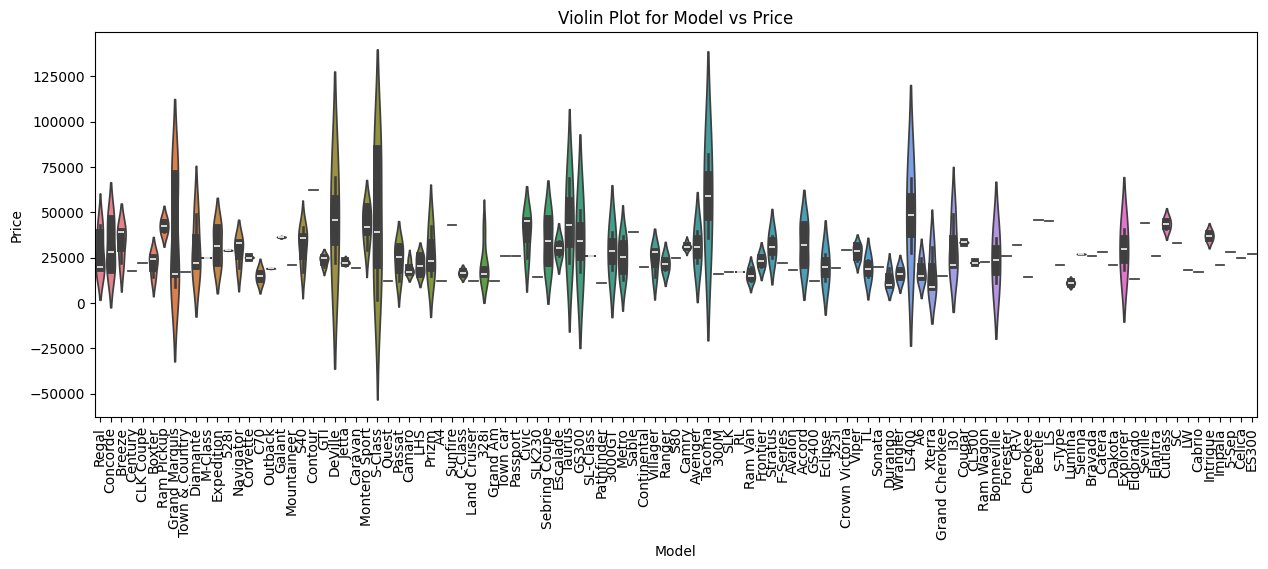

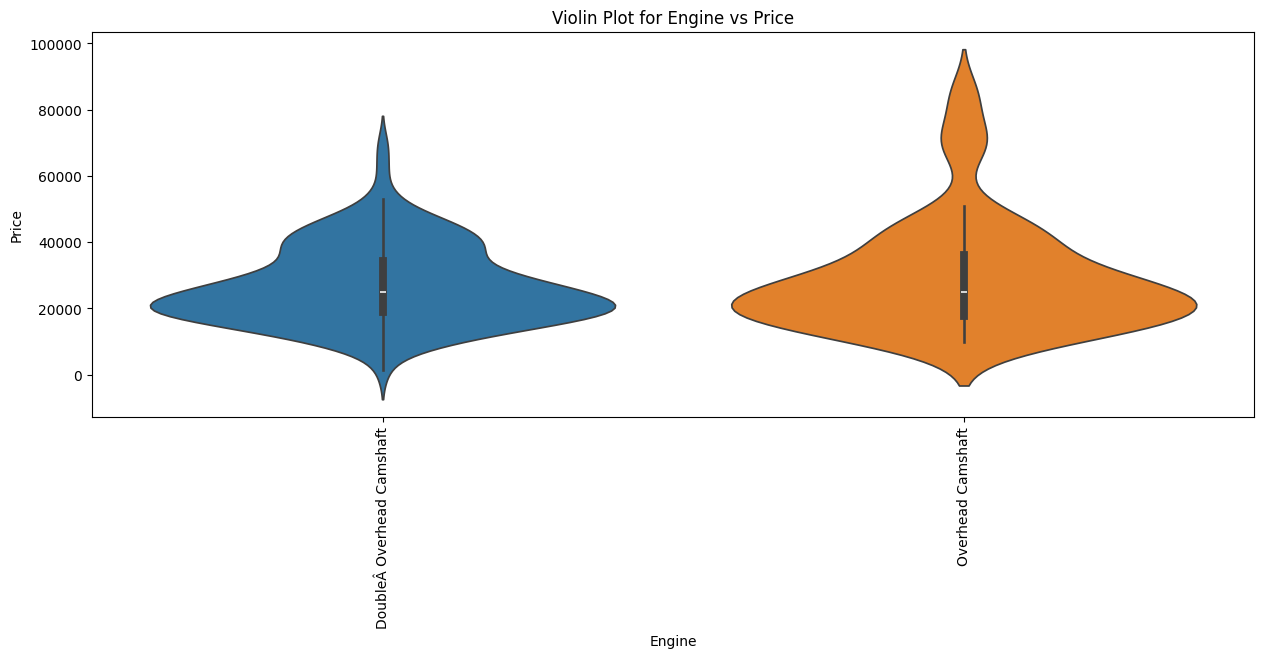

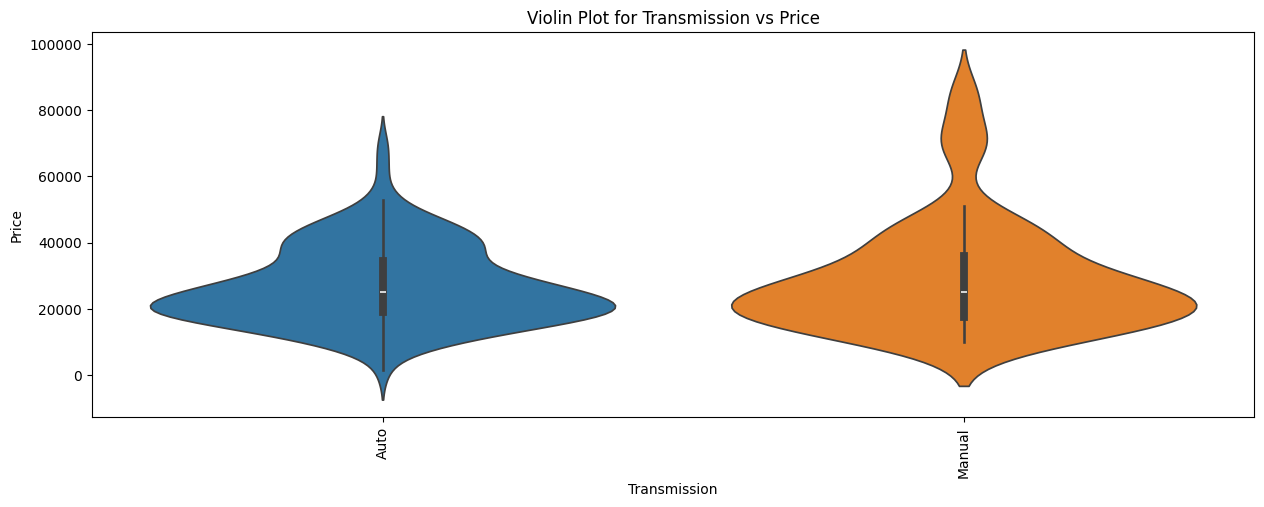

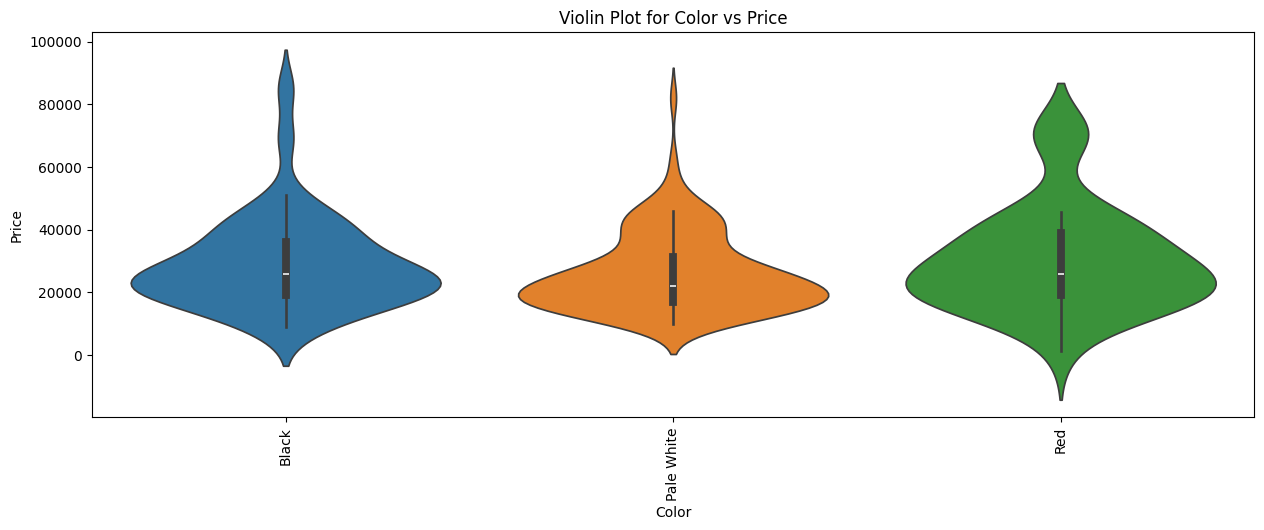

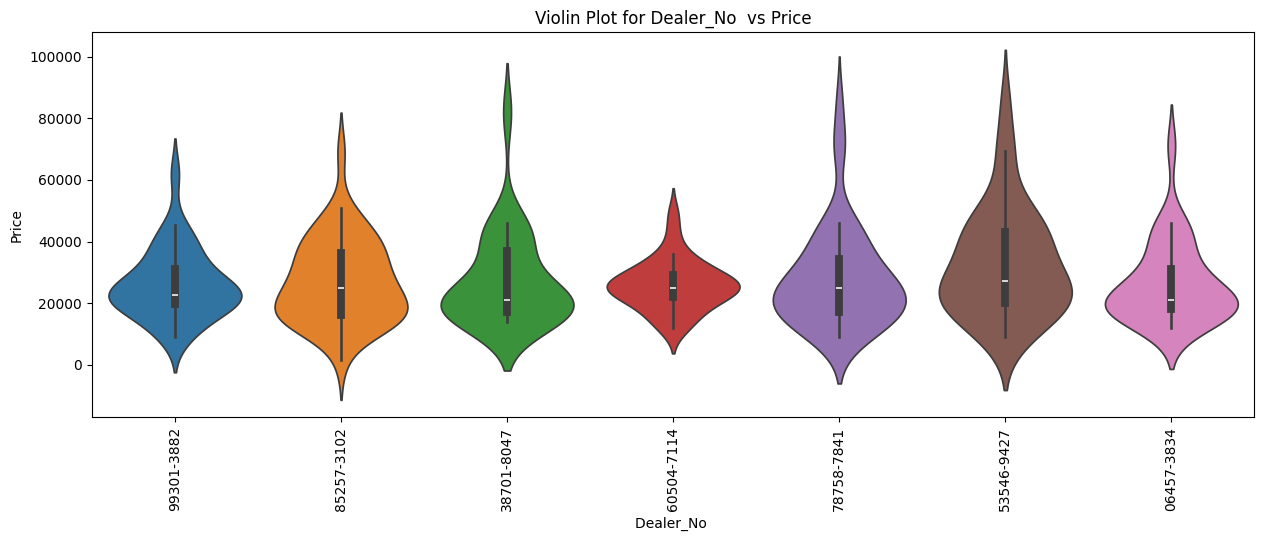

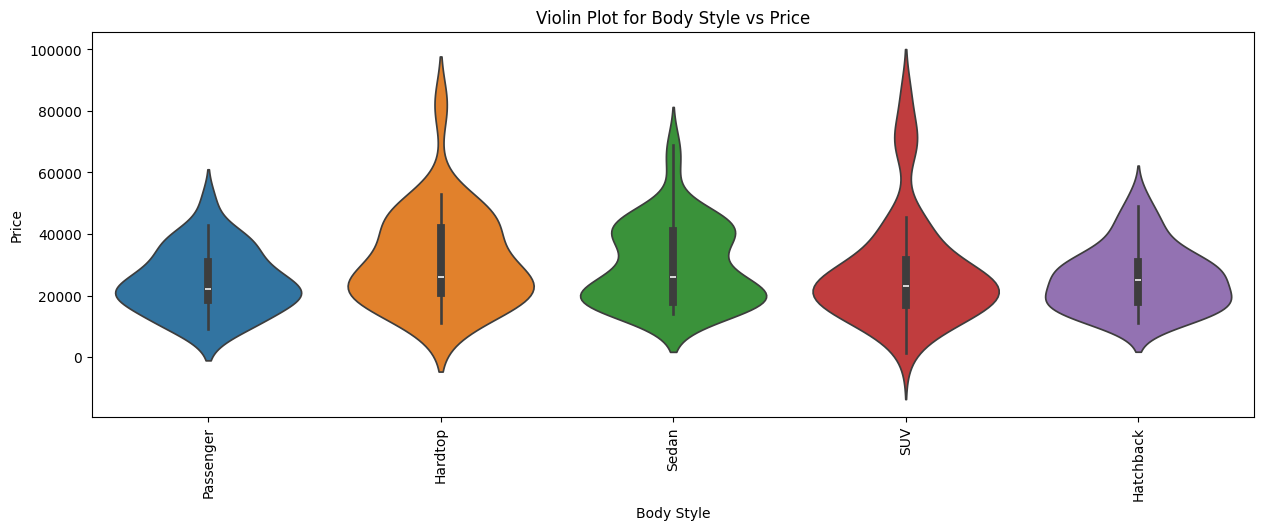

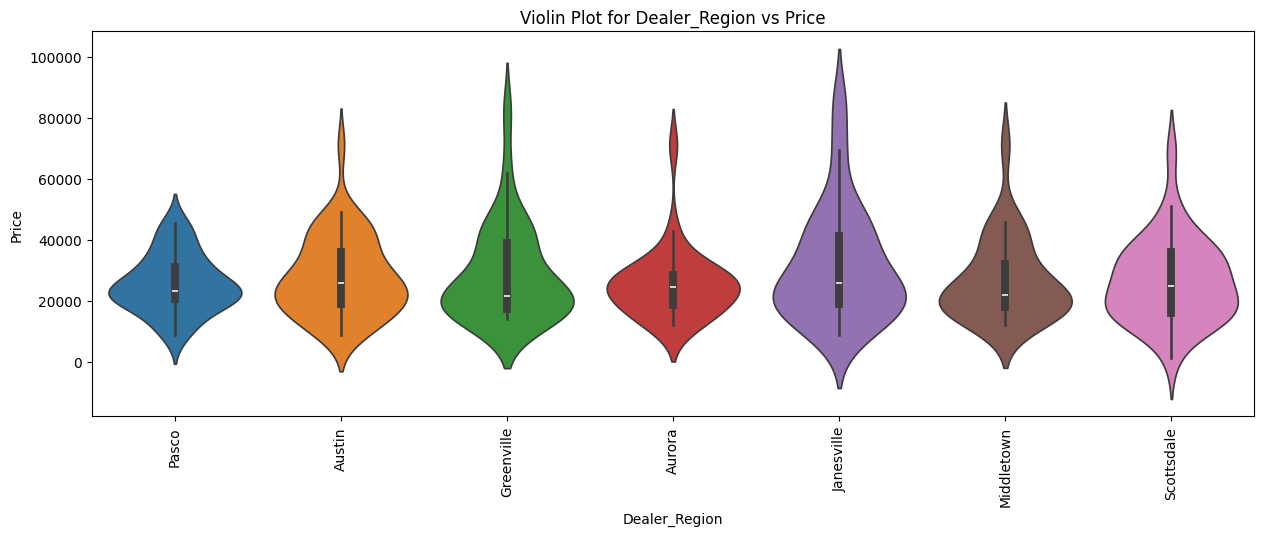

In [99]:
if not os.path.exists('./graph/bivariate'):
    os.makedirs('./graph/bivariate')

for i in range(len(object_columns)):
    plt.figure(figsize=(15, 5))
    sns.violinplot(x=object_columns[i], y='Price ($)', data=sampled_data, hue=object_columns[i])
    plt.title(f'Violin Plot for {object_columns[i]} vs Price')
    plt.xlabel(object_columns[i])
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.savefig(f'./graph/bivariate/{object_columns[i]}_vs_price_violinplot.png')

plt.show()


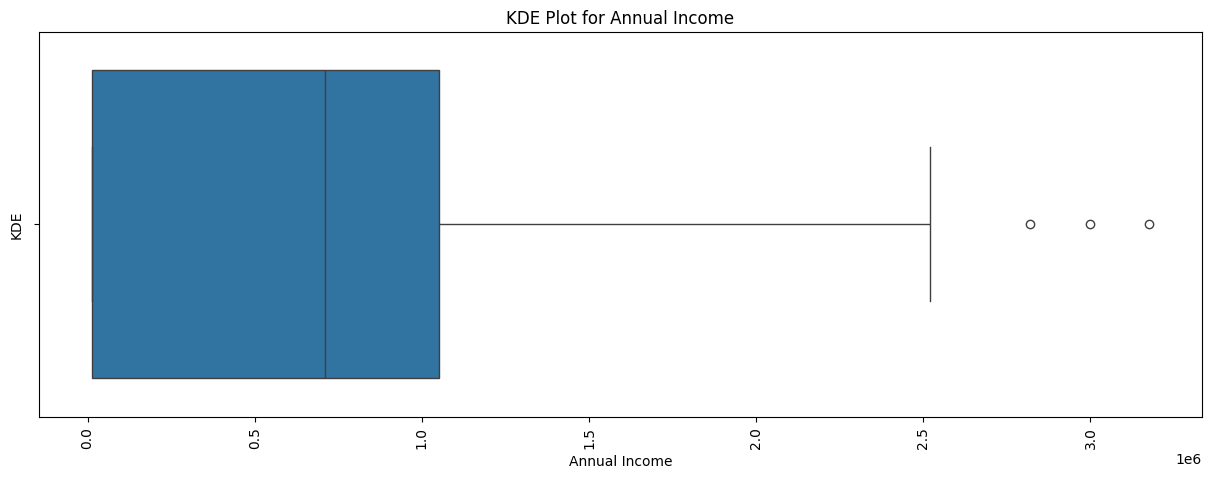

In [100]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=sampled_data['Annual Income'], data=sampled_data)
plt.title(f'KDE Plot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('KDE')
plt.xticks(rotation=90)
plt.savefig(f'./graph/bivariate/Annual_Income_KDE_plot.png')

plt.show()

## Multi-variate Analysis

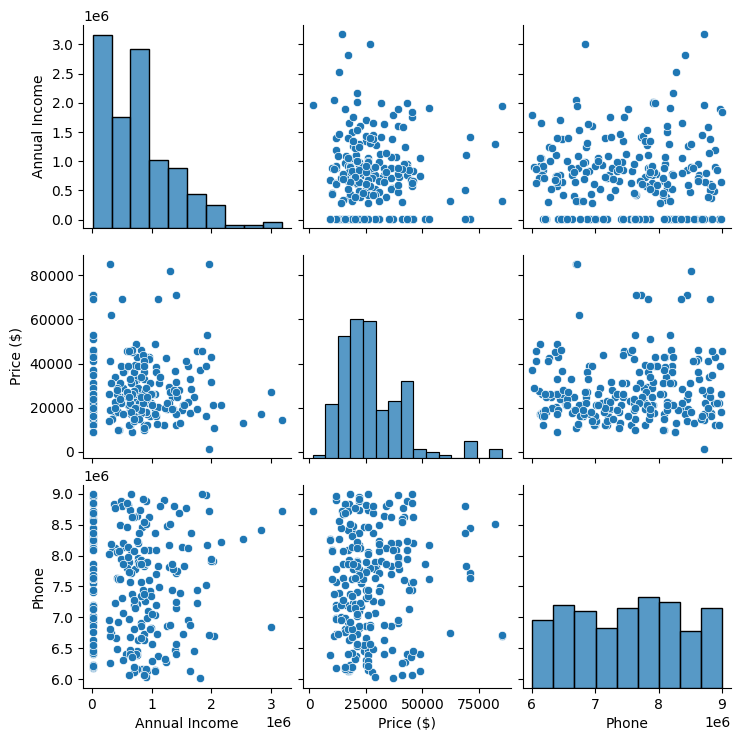

In [101]:
if not os.path.exists('./graph/multivariate'):
    os.makedirs('./graph/multivariate')

sns.pairplot(sampled_data)
plt.savefig('./graph/multivariate/pairplot.png')
plt.show()

# Convert, Encode, Normalization

## Convert `Date` to independent variable

In [102]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data = data.drop(['Date'], axis=1)

## Encoding

In [103]:
object_columns = data.select_dtypes(include=['object']).columns

#Label Encoding
le = LabelEncoder()
for i in range(len(object_columns)):
    data[object_columns[i]] = le.fit_transform(data[object_columns[i]])

## Normalizing

In [104]:
num_columns = data.select_dtypes(include=['int64', 'float64', 'int32']).columns

#Standard Scaling
scaler = StandardScaler()
for i in range(len(num_columns)):
    data[num_columns[i]] = scaler.fit_transform(data[num_columns[i]].values.reshape(-1, 1))

# Features Analysis

In [105]:
summary_stats = data.describe()

print("Summary of Statistics:")
summary_stats

Summary of Statistics:


,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Day
count,23906.000000,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,2.390600e+04,23906.000000,2.390600e+04
mean,0.000000,5.825583e-17,1.075949e-16,2.615568e-17,4.815022e-17,-1.040283e-16,2.712165e-17,1.141339e-16,1.141339e-16,-2.377789e-17,-1.031366e-16,-1.058116e-16,-7.133366e-17,2.437234e-16,-6.524058e-17,-7.692622e-14,0.000000,6.657809e-17
std,1.000021,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021,1.000021e+00
min,-1.731978,-1.660491e+00,-1.918361e+00,-1.139959e+00,-1.959826e+00,-1.631978e+00,-1.770326e+00,-9.495675e-01,-9.495675e-01,-1.217555e+00,-1.818336e+00,-1.559992e+00,-1.614562e+00,-1.726438e+00,-1.487059e+00,-1.116131e+00,-2.103468,-1.657096e+00
25%,-0.865989,-8.749062e-01,5.212783e-01,-6.178412e-01,-8.484163e-01,-9.141024e-01,-8.151911e-01,-9.495675e-01,-9.495675e-01,-1.217555e+00,-6.822417e-01,-1.049281e+00,-8.591069e-01,-8.660153e-01,-9.836588e-01,-1.116131e+00,-0.875690,-8.556297e-01
50%,0.000000,-1.167673e-02,5.212783e-01,-1.331131e-01,2.629934e-01,9.092329e-02,7.171988e-02,-9.495675e-01,-9.495675e-01,1.789938e-01,-3.442060e-01,-2.785777e-02,-1.036515e-01,-1.778854e-03,2.314219e-02,8.959519e-01,0.352089,-5.416324e-02
75%,0.865989,8.721059e-01,5.212783e-01,4.790470e-01,8.804433e-01,7.800838e-01,8.449243e-01,1.053111e+00,1.053111e+00,1.789938e-01,3.996214e-01,9.935653e-01,6.518038e-01,8.650470e-01,1.029943e+00,8.959519e-01,0.965978,8.617985e-01
max,1.731978,1.789002e+00,5.212783e-01,1.440178e+01,1.374403e+00,1.698964e+00,1.709094e+00,1.053111e+00,1.053111e+00,1.575543e+00,3.902372e+00,1.504277e+00,1.407259e+00,1.731278e+00,1.533344e+00,8.959519e-01,1.272922,1.777760e+00


In [106]:
# Skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
# Display skewness and kurtosis values
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
Car_id           0.000000
Customer Name    0.041059
Gender          -1.397171
Annual Income    1.739838
Dealer_Name     -0.436012
Company          0.140170
Model           -0.109266
Engine           0.103550
Transmission     0.103550
Color            0.193628
Price ($)        1.466316
Dealer_No       -0.053531
Body Style      -0.088763
Phone            0.000863
Dealer_Region    0.070238
Year            -0.220193
Month           -0.415582
Day              0.036949
dtype: float64

Kurtosis:
Car_id          -1.200000
Customer Name   -1.203770
Gender          -0.047918
Annual Income    7.572374
Dealer_Name     -1.059227
Company         -1.242038
Model           -1.134052
Engine          -1.989444
Transmission    -1.989444
Color           -1.041766
Price ($)        2.008315
Dealer_No       -1.217015
Body Style      -1.231417
Phone           -1.197919
Dealer_Region   -1.239599
Year            -1.951678
Month           -0.994360
Day             -1.190651
dtype: float64


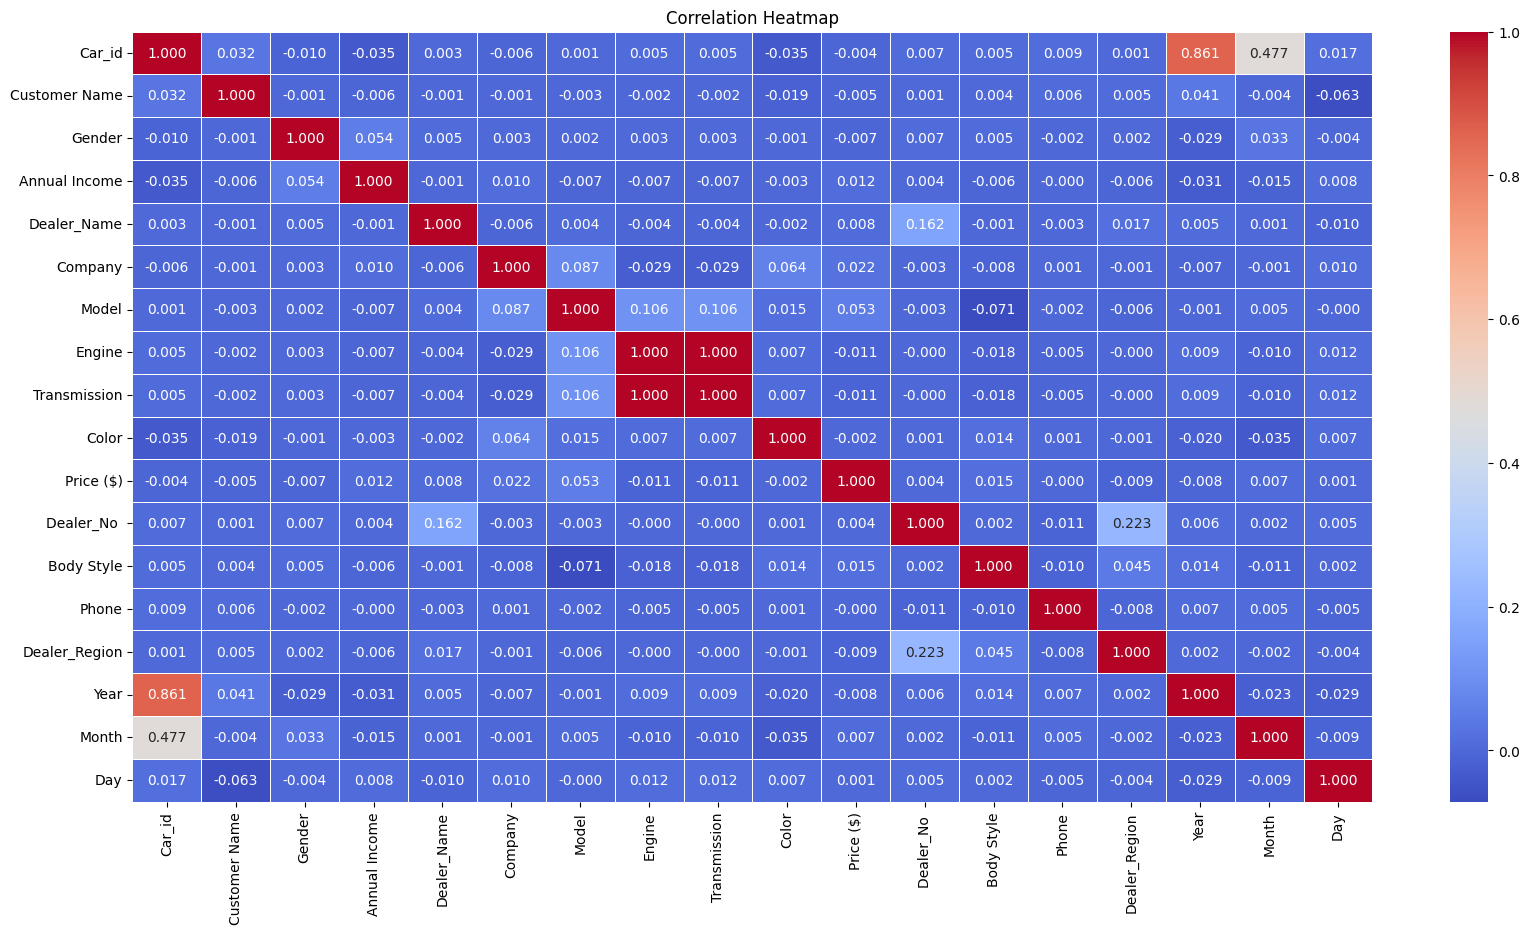

In [107]:
# Correlation matrix
correlation_matrix = data.corr()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt = ".3f")
plt.title("Correlation Heatmap")
plt.show()

In [108]:
# Calculate Multicollinearity
y = data.drop(["Price ($)"], axis =1)
X = sm.add_constant(y)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

         variable         VIF
0           const    1.000000
1          Car_id  105.862931
2   Customer Name    1.006054
3          Gender    1.004903
4   Annual Income    1.004606
5     Dealer_Name    1.027511
6         Company    1.013526
7           Model    1.025048
8          Engine         inf
9    Transmission         inf
10          Color    1.006498
11     Dealer_No     1.081082
12     Body Style    1.008219
13          Phone    1.000461
14  Dealer_Region    1.055166
15           Year   81.886806
16          Month   27.286401
17            Day    1.231240


c:\Users\YapWH\anaconda3\envs\ai\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [109]:
high_vif_variables = vif[vif["VIF"] >= 5]["variable"]
regression_data = X.drop(high_vif_variables, axis=1)

regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          23906 non-null  float64
 1   Customer Name  23906 non-null  float64
 2   Gender         23906 non-null  float64
 3   Annual Income  23906 non-null  float64
 4   Dealer_Name    23906 non-null  float64
 5   Company        23906 non-null  float64
 6   Model          23906 non-null  float64
 7   Color          23906 non-null  float64
 8   Dealer_No      23906 non-null  float64
 9   Body Style     23906 non-null  float64
 10  Phone          23906 non-null  float64
 11  Dealer_Region  23906 non-null  float64
 12  Day            23906 non-null  float64
dtypes: float64(13)
memory usage: 2.4 MB
